In [109]:
# import required libraries
import matplotlib.pyplot as plt
import sys
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [124]:
# Specify 'Ridge' or 'LASSO'
regression_type = 'Ridge'

In [125]:
# clear out old graph
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [126]:
#Sample Data : 
dataset = tf.constant([[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]])

x_vals = np.array([x[0] for x in sess.run(dataset)])
y_vals = np.array([x[1] for x in sess.run(dataset)])
print('x:')
print(x_vals)
print('y:')
print(y_vals)

x:
[ 2.78108358  1.46548939  3.39656162  1.38807023  3.06407237  7.62753105
  5.33244133  6.92259693  8.67541885  7.6737566 ]
y:
[ 2.55053711  2.36212516  4.40029335  1.85022032  3.00530601  2.75926232
  2.08862686  1.77106369 -0.24206865  3.50856304]


In [127]:
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
#iris = datasets.load_iris()
#x_vals = np.array([x[3] for x in iris.data])
#y_vals = np.array([y[0] for y in iris.data])

In [128]:
# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# make results reproducible
seed = 13
np.random.seed(seed)
tf.set_random_seed(seed)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [129]:
# Select appropriate loss function based on regression type

if regression_type == 'LASSO':
    # Declare Lasso loss function
    # Lasso Loss = L2_Loss + heavyside_step,
    # Where heavyside_step ~ 0 if A < constant, otherwise ~ 99
    lasso_param = tf.constant(0.9)
    heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-50., tf.subtract(A, lasso_param)))))
    regularization_param = tf.multiply(heavyside_step, 99.)
    loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

elif regression_type == 'Ridge':
    # Declare the Ridge loss function
    # Ridge loss = L2_loss + L2 norm of slope
    ridge_param = tf.constant(1.)
    ridge_loss = tf.reduce_mean(tf.square(A))
    loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.multiply(ridge_param, ridge_loss)), 0)
    
else:
    print('Invalid regression_type parameter value',file=sys.stderr)

In [130]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)

In [131]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%300==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
        print('\n')

Step #300 A = [[ 0.27658939]] b = [[ 0.40824792]]
Loss = [ 4.17956638]


Step #600 A = [[ 0.220755]] b = [[ 0.76028377]]
Loss = [ 3.23324871]


Step #900 A = [[ 0.17208084]] b = [[ 1.06957066]]
Loss = [ 3.04098201]


Step #1200 A = [[ 0.15170702]] b = [[ 1.33865976]]
Loss = [ 2.70066428]


Step #1500 A = [[ 0.10017899]] b = [[ 1.56040418]]
Loss = [ 0.83947706]




In [132]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

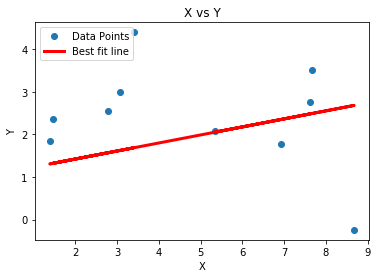

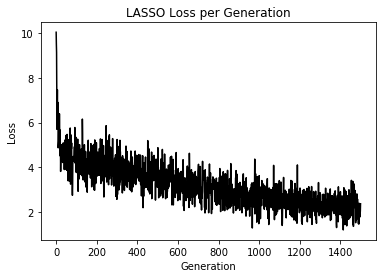

In [123]:
%matplotlib inline
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title(regression_type + ' Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()